
# 🧪 Prática de Laboratório: Co-registro de Imagens 3D com ITK em Python

## 🎯 Objetivo
Aplicar técnicas de co-registro (alinhamento) de imagens tridimensionais médicas utilizando a biblioteca ITK, explorando conceitos de transformações espaciais, interpolação e métricas de similaridade.

---

## 📚 Conteúdo Abordado
- Leitura e visualização de imagens médicas 3D (formato NIfTI ou DICOM)
- Pré-processamento de imagens
- Registro rígido e afim entre volumes
- Avaliação da qualidade do registro
- Visualização de resultados

---

## 🛠️ Ferramentas Necessárias
- Python 3.8+
- Bibliotecas: `itk`, `matplotlib`, `numpy`, `SimpleITK` (opcional para visualização)
- Conjunto de dados: dois volumes 3D (ex: imagens de ressonância magnética de crânio em tempos diferentes)

---

## 📁 Estrutura da Atividade


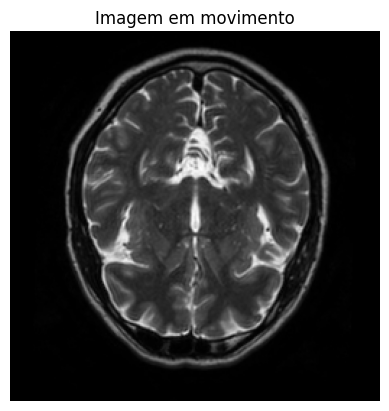

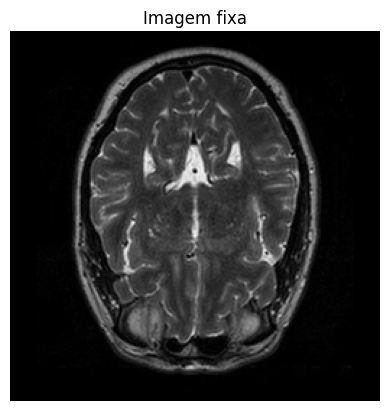

In [41]:
import itk
import numpy as np
import matplotlib.pyplot as plt

# 1) Leitura das imagens
fixed_image = itk.imread("IXI644-Guys-1121-T2.nii.gz", itk.F)
moving_image = itk.imread("IXI662-Guys-1120-T2.nii.gz", itk.F)

# Reorienta a imagem móvel para a direção da imagem fixa
resampler_orient = itk.ResampleImageFilter.New(Input=moving_image)
resampler_orient.SetReferenceImage(fixed_image)
resampler_orient.UseReferenceImageOn()
resampler_orient.SetTransform(itk.IdentityTransform[itk.D, 3].New())  # Nenhuma transformação no momento
resampler_orient.Update()
moving_image = resampler_orient.GetOutput()

slice_idx = 60
arr = itk.GetArrayFromImage(moving_image)
plt.imshow(arr[slice_idx], cmap="gray"); plt.axis("off")
plt.title("Imagem em movimento")
plt.show()

arr2 = itk.GetArrayFromImage(fixed_image)
plt.imshow(arr2[slice_idx], cmap="gray"); plt.axis("off")
plt.title("Imagem fixa")
plt.show()

Registro concluído em 120.32 s


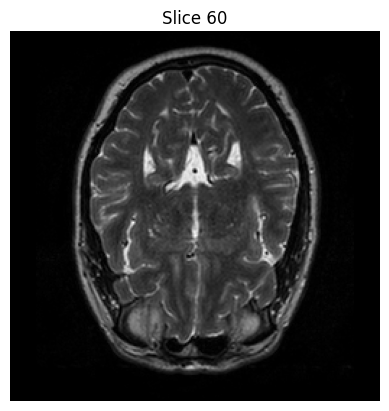

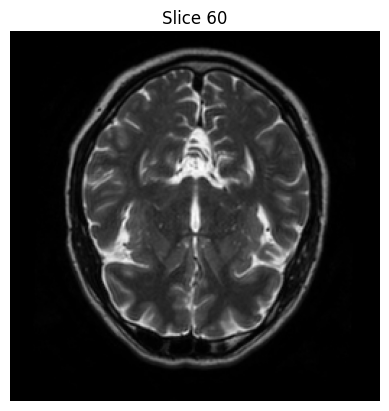

In [42]:
# 2) Definições de tipo e criação do registrador templateado
Dimension        = 3
PixelType        = itk.F
ImageType        = itk.Image[PixelType, Dimension]
RegistrationType = itk.ImageRegistrationMethodv4[ImageType, ImageType]

registration = RegistrationType.New()
registration.SetFixedImage(fixed_image)
registration.SetMovingImage(moving_image)

# 3) Métrica Mattes Mutual Information
MetricType = itk.MattesMutualInformationImageToImageMetricv4[ImageType, ImageType]
metric     = MetricType.New()
metric.SetNumberOfHistogramBins(50)
registration.SetMetric(metric)

# 4) Otimizador Gradient Descent
OptimizerType = itk.GradientDescentOptimizerv4
optimizer     = OptimizerType.New()
optimizer.SetLearningRate(1.0)
optimizer.SetNumberOfIterations(100)
registration.SetOptimizer(optimizer)

# 5) Executa o registro e mede o tempo
start = time.time()
registration.Update()
print(f"Registro concluído em {time.time() - start:.2f} s")

# 6) Resample usando a geometria do fixed_image
result_image = itk.resample_image_filter(
    moving_image,
    transform=registration.GetTransform(),
    reference_image=fixed_image,
    use_reference_image=True
)

# 7) Função para visualizar fatia
def show_slice(image, slice_index=60):
    arr = itk.GetArrayFromImage(image)
    plt.imshow(arr[slice_index], cmap='gray')
    plt.title(f"Slice {slice_index}")
    plt.axis('off')
    plt.show()

# 8) Visualiza “Antes” e “Depois”
show_slice(fixed_image,  60)  # Antes
show_slice(result_image, 60)  # Depois



## 🧠 Tarefas Propostas
1. Altere o tipo de transformação para afim e observe os resultados.
2. Experimente diferentes métricas de similaridade (ex: MeanSquares).
3. Avalie visualmente o alinhamento entre as imagens.
4. (Desafio) Implemente um pipeline de registro multirresolução.

---

## ✅ Critérios de Avaliação
- Funcionamento correto do pipeline de registro
- Clareza na visualização dos resultados
- Discussão sobre a qualidade do registro
- Criatividade na exploração de parâmetros
